# Scrapy

[PySocks](https://github.com/Anorov/PySocks)

In [3]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [4]:
class Spider12(scrapy.Spider):
    name = "spider12"
    allowed_domain = [
        "pagina12.com.ar"
    ]
    custom_settings = {
        "FEED_FORMAT": "json",
        "FEED_URL": "resultados.json",
        "DEPTH_LIMIT": 2
    }
    
    start_urls = [
        "https://www.pagina12.com.ar/secciones/el-pais",
        "https://www.pagina12.com.ar/secciones/economia",
        "https://www.pagina12.com.ar/secciones/sociedad",
        "https://www.pagina12.com.ar/secciones/ciencia",
        "https://www.pagina12.com.ar/secciones/el-mundo",
        "https://www.pagina12.com.ar/secciones/deportes",
        "https://www.pagina12.com.ar/secciones/contratapa",
    ]
    
    def parse(self, response):
        # Articulo promocionado
        nota_promocionada = response.xpath('//div[@class="featured-article__container"]/h2/a/@href').get()
        if nota_promocionada is not None:
            yield response.follow(nota_promocionada, callback=self.parse_nota)
            
        # Listado de Notas
        notas = response.xpath('//ul[@class="article-list"]//li//a/@href').getall()
        for nota in notas:
            yield response.follow(nota, callback=self.parse_nota)
            
        # Link a la siguiente pagina
        next_page = response.xpath('//a[@class="pagination-btn-next"]/@href)')
        if next_page is not None:
            yield response.follow(next_page, callback=self.parse)
            
    def parse_nota(self, response):
        """Función que extrae la información de cada nota"""

        # Parseo de la nota
        title = response.xpath('//div[@class="article-title"]/text()').get()
        date = response.xpath('//span[@pubdate="pubdate"]/@datetime').get()
        summary = response.xpath('//div[@class="article-summary"]/text()').get()
        prefix = response.xpath('//div[@class="article-prefix"]/text()').get()
        media = response.xpath('//div[@class="article-main-media-image"]/@data-src').getall()[-1]
        body = "".join(
            response.xpath('//div[@class="article-text"]/p/text()').getall()
        )
        author = response.xpath('//div[@class="article-author"]//span//a/text()').get()
        
        yield {
            "url": response.url,
            "title": title,
            "body": body
        }
        

In [5]:
process = CrawlerProcess()
process.crawl(Spider12)
process.start()

2020-03-06 00:35:20 [scrapy.utils.log] INFO: Scrapy 2.0.0 started (bot: scrapybot)
2020-03-06 00:35:20 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.10.0, Python 3.7.4 (default, Aug 13 2019, 20:35:49) - [GCC 7.3.0], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.7, Platform Linux-5.3.0-40-generic-x86_64-with-debian-buster-sid
2020-03-06 00:35:20 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-03-06 00:35:20 [scrapy.crawler] INFO: Overridden settings:
{'DEPTH_LIMIT': 2, 'FEED_FORMAT': 'json'}
2020-03-06 00:35:20 [scrapy.extensions.telnet] INFO: Telnet Password: 09360eb14250eb1d
2020-03-06 00:35:20 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-03-06 00:35:20 [scrapy.middleware] INFO: Enabl

2020-03-06 00:35:20 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/secciones/el-mundo> (referer: None)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/parsel/selector.py", line 238, in xpath
    **kwargs)
  File "src/lxml/etree.pyx", line 1581, in lxml.etree._Element.xpath
  File "src/lxml/xpath.pxi", line 305, in lxml.etree.XPathElementEvaluator.__call__
  File "src/lxml/xpath.pxi", line 225, in lxml.etree._XPathEvaluatorBase._handle_result
lxml.etree.XPathEvalError: Invalid expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-pac

2020-03-06 00:35:20 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/secciones/economia> (referer: None)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/parsel/selector.py", line 238, in xpath
    **kwargs)
  File "src/lxml/etree.pyx", line 1581, in lxml.etree._Element.xpath
  File "src/lxml/xpath.pxi", line 305, in lxml.etree.XPathElementEvaluator.__call__
  File "src/lxml/xpath.pxi", line 225, in lxml.etree._XPathEvaluatorBase._handle_result
lxml.etree.XPathEvalError: Invalid expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-pac

2020-03-06 00:35:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251188-miguel-russo-boca-sabe-que-se-juega-el-campeonato-y-la-gente> (referer: https://www.pagina12.com.ar/secciones/deportes)
2020-03-06 00:35:21 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251192-gustavo-bou-si-me-llaman-de-racing-ya-saben-mi-respuesta> (referer: https://www.pagina12.com.ar/secciones/deportes)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable


2020-03-06 00:35:21 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251209-superliga-el-trofeo-estara-en-la-bombonera-y-no-en-tucuman> (referer: https://www.pagina12.com.ar/secciones/deportes)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.

2020-03-06 00:35:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251052-habra-paridad-de-genero-en-la-reforma-constitucional-de-chil> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
2020-03-06 00:35:21 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251195-amenaza-de-muerte-en-atletico-tucuman> (referer: https://www.pagina12.com.ar/secciones/deportes)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterab

2020-03-06 00:35:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251299-los-controladores-aereos-lograron-un-aumento-salarial-del-52> (referer: https://www.pagina12.com.ar/secciones/el-pais)
2020-03-06 00:35:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/autores/135519-bel-trew> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
2020-03-06 00:35:21 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251049-la-ministra-de-la-mujer-dio-la-cara> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, 

2020-03-06 00:35:21 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251291-en-la-corte-nadie-rompe-el-silencio> (referer: https://www.pagina12.com.ar/secciones/el-pais)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/c

2020-03-06 00:35:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251138-lola-berthet-cuando-la-cultura-y-los-derechos-humanos-estan-> (referer: https://www.pagina12.com.ar/secciones/el-pais)
2020-03-06 00:35:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251132-denuncia-contra-la-afip-macrista-por-llevar-a-la-quiebra-a-o> (referer: https://www.pagina12.com.ar/secciones/el-pais)
2020-03-06 00:35:22 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251289-scioli-presento-su-renuncia-como-diputado-para-asumir-como-e> (referer: https://www.pagina12.com.ar/secciones/el-pais)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anacon

2020-03-06 00:35:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251202-impulsan-la-expulsion-de-pichetto-del-pj> (referer: https://www.pagina12.com.ar/secciones/el-pais)
2020-03-06 00:35:22 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251242-rodriguez-larreta-en-2019-subejecuto-el-21-por-ciento-del-pr> (referer: https://www.pagina12.com.ar/secciones/el-pais)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in itera

2020-03-06 00:35:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251025-la-mesa-de-enlace-ya-comienza-a-crujir> (referer: https://www.pagina12.com.ar/secciones/economia)
2020-03-06 00:35:22 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251183-los-lazos-del-perito-trucho-con-el-gobierno-de-macri> (referer: https://www.pagina12.com.ar/secciones/el-pais)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  Fi

2020-03-06 00:35:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/248039-homo-in-mobile> (referer: https://www.pagina12.com.ar/secciones/contratapa)
2020-03-06 00:35:22 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251208-retenciones-al-campo-la-mesa-de-enlace-prepara-el-lockout> (referer: https://www.pagina12.com.ar/secciones/economia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteba

2020-03-06 00:35:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/248911-el-desequilibrio> (referer: https://www.pagina12.com.ar/secciones/contratapa)
2020-03-06 00:35:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/248315-otra-mirada-sobre-un-gaucho-judio> (referer: https://www.pagina12.com.ar/secciones/contratapa)
2020-03-06 00:35:22 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/248670-el-renacimiento-de-lucia> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(sel

2020-03-06 00:35:23 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/autores/842-guillermo-saccomanno> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spi

2020-03-06 00:35:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251240-coronavirus-el-contagiado-argentino-sigue-aislado-y-en-buen-> (referer: https://www.pagina12.com.ar/secciones/sociedad)
2020-03-06 00:35:23 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/autores/24348-eva-giberti> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home

2020-03-06 00:35:23 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/249392-violacion-seguida-de-muerte-en-puerto-deseado-otra-vez-lo-mi> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/pyth

2020-03-06 00:35:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251301-cancelacion-de-vuelos> (referer: https://www.pagina12.com.ar/secciones/sociedad)
2020-03-06 00:35:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251296-coronavirus-segundo-caso-en-la-argentina> (referer: https://www.pagina12.com.ar/secciones/sociedad)
2020-03-06 00:35:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251295-crimen-de-gesell-un-nuevo-video-del-ataque-de-los-rugbiers> (referer: https://www.pagina12.com.ar/secciones/sociedad)
2020-03-06 00:35:23 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251297-otras-41-muertes-en-italia> (referer: https://www.pagina12.com.ar/secciones/sociedad)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/

2020-03-06 00:35:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251280-un-requiem-para-cacho-carpatos> (referer: https://www.pagina12.com.ar/secciones/sociedad)
2020-03-06 00:35:23 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251285-upd-hablemos-de-alcohol-de-verdad> (referer: https://www.pagina12.com.ar/secciones/sociedad)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda

2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251250-la-construccion-sigue-en-caida> (referer: https://www.pagina12.com.ar/secciones/economia)
2020-03-06 00:35:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251228-el-coronavirus-y-el-nuevo-saludo-que-se-impone-en-todos-los-> (referer: https://www.pagina12.com.ar/secciones/sociedad)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  F

2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251237-despues-de-dos-anos-menos-de-2-por-ciento> (referer: https://www.pagina12.com.ar/secciones/economia)
2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/249046-la-rabia-del-marginado> (referer: https://www.pagina12.com.ar/secciones/contratapa)
2020-03-06 00:35:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251243-la-destruccion-laboral-que-provoco-cambiemos> (referer: https://www.pagina12.com.ar/secciones/economia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, i

2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251292-cese-de-ventas-contra-las-retenciones-a-la-soja> (referer: https://www.pagina12.com.ar/secciones/economia)
2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251278-ypf-registro-una-perdida-millonaria> (referer: https://www.pagina12.com.ar/secciones/economia)
2020-03-06 00:35:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251126-el-gobierno-oficializo-la-suba-de-retenciones-como-queda-el-> (referer: https://www.pagina12.com.ar/secciones/economia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scr

2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/249758-parasite-no-es-fantasia> (referer: https://www.pagina12.com.ar/secciones/contratapa)
2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251257-citan-a-jet-smart> (referer: https://www.pagina12.com.ar/secciones/economia)
2020-03-06 00:35:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251273-volvio-a-bajar-la-tasa> (referer: https://www.pagina12.com.ar/secciones/economia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File 

2020-03-06 00:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/250225-mauricio-macri-y-juarez-celman> (referer: https://www.pagina12.com.ar/secciones/contratapa)
2020-03-06 00:35:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/autores/1998-julian-varsavsky> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/p

2020-03-06 00:35:25 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/250481-la-construccion-de-un-lenguaje-en-comun> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/s

2020-03-06 00:35:25 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/250856-otra-mirada-sobre-alfonsina> (referer: https://www.pagina12.com.ar/secciones/contratapa)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/s

2020-03-06 00:35:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/250991-futuro-incierto-para-warren> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
2020-03-06 00:35:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251206-siete-anos-sin-chavez> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
2020-03-06 00:35:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/250980-biden-se-agranda-con-la-salida-de-bloomberg> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
2020-03-06 00:35:25 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/250991-futuro-incierto-para-warren> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages

2020-03-06 00:35:25 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251272-elizabeth-warren-se-bajo-de-la-carrera-presidencial-democrat> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python

2020-03-06 00:35:25 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/autores/1852-atilio-a-boron> (referer: https://www.pagina12.com.ar/secciones/el-mundo)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.p

2020-03-06 00:35:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251136-desestiman-apelacion-de-platini-en-caso-de-corrupcion> (referer: https://www.pagina12.com.ar/secciones/deportes)
2020-03-06 00:35:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/251157-la-fifa-recomienda-postergar-las-eliminatorias-asiaticas-por> (referer: https://www.pagina12.com.ar/secciones/deportes)
2020-03-06 00:35:26 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/251136-desestiman-apelacion-de-platini-en-caso-de-corrupcion> (referer: https://www.pagina12.com.ar/secciones/deportes)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/pyt

2020-03-06 00:35:26 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/234473-entre-la-ciencia-y-las-tablas> (referer: https://www.pagina12.com.ar/secciones/ciencia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/sp

2020-03-06 00:35:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/241767-una-tecnologia-que-no-da-puntada-ni-hilo> (referer: https://www.pagina12.com.ar/secciones/ciencia)
2020-03-06 00:35:27 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/240478-clorpirifos-otro-insecticida-que-enciende-las-alarmas> (referer: https://www.pagina12.com.ar/secciones/ciencia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  

2020-03-06 00:35:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.pagina12.com.ar/244567-dime-como-es-tu-saliva-y-te-dire-quien-eres> (referer: https://www.pagina12.com.ar/secciones/ciencia)
2020-03-06 00:35:27 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/242097-aumento-para-las-becas-del-conicet> (referer: https://www.pagina12.com.ar/secciones/ciencia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/este

2020-03-06 00:35:27 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.pagina12.com.ar/autores/6144-pablo-esteban> (referer: https://www.pagina12.com.ar/secciones/ciencia)
Traceback (most recent call last):
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/defer.py", line 117, in iter_errback
    yield next(it)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/utils/python.py", line 345, in __next__
    return next(self.data)
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py", line 64, in _evaluate_iterable
    for r in iterable:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in process_spider_output
    for x in result:
  File "/home/esteban/anaconda3/lib/python3.7/site-packages/scrapy/core/spidermw.py"

# OCR con Tesseract

[Tesserocr](https://pypi.org/project/tesserocr/)

Una biblioteca creada por HP (Actualmente mantenida por Google) para realizar reconocimiento optico de caracteres

In [14]:
#import tesserocr # Para hacer OCR
import numpy as np # Para hacer manipulacion basica de imagenes
import matplotlib.pyplot as plt # Para Visualizar imagenes
from PIL import Image # Para cambiar el formato de los archivos

%matplotlib inline

2020-03-06 00:54:40 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


(-0.5, 591.5, 147.5, -0.5)

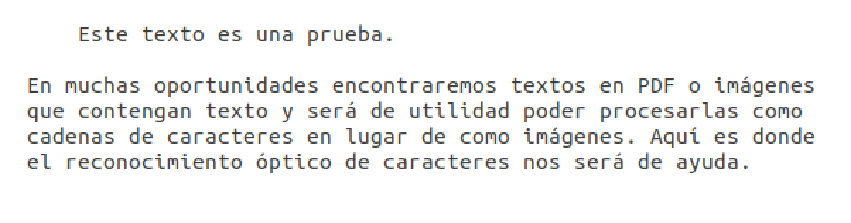

In [23]:
texto_largo = plt.imread("image_test_2.png")
plt.figure(figsize=(15,5))
plt.imshow(texto_largo)
plt.axis(False)

In [ ]:
texto_ocr = tesserocr.file_to_text("image_test_2.png", lang="spa")
print(texto_ocr)

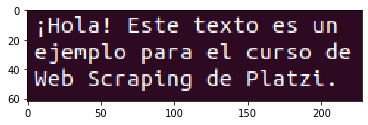

In [26]:
img = plt.imread("image_test_1.png")
plt.imshow(img)


In [ ]:
texto_ocr = tesserocr.file_to_text("image_test_1.png", lang="spa")
print(texto_ocr)

In [27]:
img.shape

(62, 228, 4)

In [28]:
img_rgb = img[:,:,:3]

In [29]:
img_rgb.shape

(62, 228, 3)

In [30]:
img_rgb[0,0,0]

0.1764706

In [31]:
img_inv = 1 - img_rgb

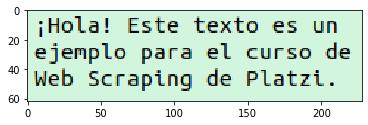

In [32]:
plt.imshow(img_inv)

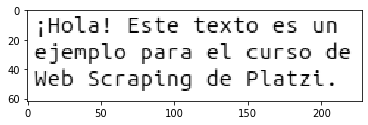

In [39]:
img_rb = img_inv.mean(axis=2)
plt.imshow(img_rb, cmap="Greys_r")

In [40]:
img_pil = Image.fromarray(np.uint8(img_rb * 255))

In [ ]:
texto_ocr = tesserocr.file_to_text(img_pil, lang="spa")
print(texto_ocr)

In [ ]:
texto_ocr = tesserocr.file_to_text(img_inv, lang="spa")
print(texto_ocr)